In [1]:
import pandas as pd
import scipy as sp
import numpy as np

In [2]:
CP_data_1 = sp.io.loadmat('../TIMN_CP_data/1-50_Data.mat')
CP_data_2 = sp.io.loadmat('../TIMN_CP_data/51-108_Data.mat')

In [3]:
CP_data_1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'CP', 'Grand_CP', 'grandcpboot', 'new_paths', 'p_values'])

In [4]:
CP_1 = CP_data_1.get('CP')
Grand_CP_1 = CP_data_1.get('Grand_CP')
grandcpboot_1 = CP_data_1.get('grandcpboot')
p_values_1 = CP_data_1.get('p_values')
data_paths_1 = CP_data_1.get('new_paths')

In [5]:
CP_2 = CP_data_2.get('CP')
Grand_CP_2 = CP_data_2.get('Grand_CP')
grandcpboot_2 = CP_data_2.get('grandcpboot')
p_values_2 = CP_data_2.get('p_values')
data_paths_2 = CP_data_2.get('new_paths')

Now that data is extracted let look at the Grand CP Histograms of the 200 ms duration tone in noise. Split them into seperate histos for IC and CN.  

In [6]:
# Initial Split and concat grand cp values into seperate IC and CN df's
# column 16 (index 15) is the 200 ms condition 
# Group 1 -- 1 - 50 is all IC ,  
# Group 2 --  51 - 108 where 51-72(22 units) is IC and 73-108(36 units) is CN


# IC values 
IC_value_list = []

for row in range(0,len(Grand_CP_1[:,15])):
    if (type(Grand_CP_1[:,15][row][0]) == np.ndarray) & (len(Grand_CP_1[:,15][row][0]) > 0):
         value = Grand_CP_1[:,15][row][0,0]   
    else:
         value = Grand_CP_1[:,15][row][0]

    IC_value_list.append(value)

for row in range(0,22): #Grab the first 22 from CP_data_2 that are IC
    if (type(Grand_CP_2[:,15][row][0]) == np.ndarray) & (len(Grand_CP_2[:,15][row][0]) > 0): # this handles the NA values
         value = Grand_CP_2[:,15][row][0,0]   
    else:
         value = Grand_CP_2[:,15][row][0]

    IC_value_list.append(value)




In [7]:
# CN values 
CN_value_list = []
for row in range(22,len(Grand_CP_2[:,15])):#Exclude the first 22 rows that are IC 
    if (type(Grand_CP_2[:,15][row][0]) == np.ndarray) & (len(Grand_CP_2[:,15][row][0]) > 0):
         value = Grand_CP_2[:,15][row][0,0]   
    else:
         value = Grand_CP_2[:,15][row][0]

    CN_value_list.append(value)    


Now we have 2 list for the 200ms tone column for IC and CN, lets filter out NA or empty data and plot the histograms

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#Filter the lists fro NA's and emptys and turn them into pd.DataFrame
IC_df = pd.DataFrame(IC_value_list, columns=['200_ms_Tone_Grand_CP'])
CN_df = pd.DataFrame(CN_value_list, columns=['200_ms_Tone_Grand_CP'])

In [10]:
for row in range(0,len(IC_df)):
    if (type(IC_df['200_ms_Tone_Grand_CP'][row]) == np.ndarray) | (type(IC_df['200_ms_Tone_Grand_CP'][row]) == np.str_):
        IC_df['200_ms_Tone_Grand_CP'][row] = np.nan

for row in range(0,len(CN_df)):
    if (type(CN_df['200_ms_Tone_Grand_CP'][row]) == np.ndarray) | (type(CN_df['200_ms_Tone_Grand_CP'][row]) == np.str_):
        CN_df['200_ms_Tone_Grand_CP'][row] = np.nan


In [11]:
# Count the NA values to get total number of Units for IC and CN
total_units_IC = len(IC_df.dropna())
total_units_CN = len(CN_df.dropna())
print(total_units_IC, total_units_CN)

70 28


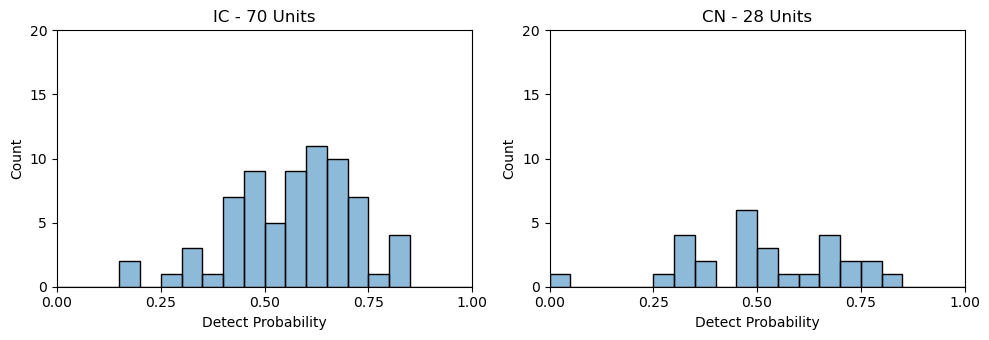

In [13]:
plt.rcParams["figure.figsize"] = [10, 3.50]
plt.rcParams["figure.autolayout"] = True


fig, axes = plt.subplots(1, 2)

axes[0].set_xlim([0,1])
axes[0].set_xticks(np.arange(0, 1.25, step=0.25))
axes[0].set_yticks(np.arange(0, 25, step=5))
axes[0].set_ylim([0,20])
axes[0].set_xlabel('Detect Probability')

axes[1].set_xlim([0,1])
axes[1].set_xticks(np.arange(0, 1.25, step=0.25))
axes[1].set_yticks(np.arange(0, 25, step=5))
axes[1].set_ylim([0,20])
axes[1].set_xlabel('Detect Probability')

# IC Histogram
axes[0].set_title('IC - 70 Units')
sns.histplot(ax = axes[0],
             data = IC_df,
             binwidth = .05,
             binrange = [0, 1],
             legend = False
            )

# CN Histogram
axes[1].set_title('CN - 28 Units')
sns.histplot(ax = axes[1],
             data = CN_df,
             binwidth = .05,
             binrange = [0, 1],
             legend = False
            )

plt.show()